### Student name: Veselova Arina BEC201

In [59]:
import pandas as pd
# download data
data_long = pd.read_csv('long.csv')
data_wide = pd.read_csv('wide.csv')

I will use the wide data instead of long, because the second one has some repetition, that, as a consequence, will result in layering dots in Figure 2 and unrepresentative outcome. 

In [101]:
pd.set_option('display.max_columns', None)

In [102]:
data_wide

,session,lot_order,lot_order_norm,lot_num,lot_id,estim,res_i,result,win_bid,win_firm,neg_bid,neg_firm,neg_delay,stand,cut,surf,land_area,forest,clauses,quality,conditions,grape,ref,owner,n_trees,n_poles,v_total,v_crown,v_stem,v_stump,v_stem_other_foliar,v_stem_other_conifer,v_stem_oak,v_stem_spruce,v_stem_beech,v_stem_pine,v_stem_fir,v_crown_foliar,v_crown_conifer,res_im1,res_im2,res_im3,date_im1,date_im2,date_im3,n_bidders,n_lots,all_bids,all_firms,random_bid_1,random_bid_2,random_bid_3,random_bid_4,random_bid_5,random_bid_6,herf1,herf100,ln_herf100,min_bid,max_bid,mean_bid,sd_bid,sec_bid,thi_bid,dres_min_bid,dres_mean_bid,dres_max_bid,pres_min_bid,pres_mean_bid,pres_max_bid,min_resest,mgmin,max_resest,mgmax,mgr,mge,rge,revise_up,revise_down,ln_session,ln_lot_order,ln_lot_order_norm,ln_surf,ln_n_bidders,ln_n_trees,ln_n_poles,ln_v_total,ln_v_crown,ln_v_stem,ln_v_stump,ln_v_stem_other_foliar,ln_v_stem_other_conifer,ln_v_stem_oak,ln_v_stem_spruce,ln_v_stem_beech,ln_v_stem_pine,ln_v_stem_fir,ln_v_crown_foliar,ln_v_crown_conifer,ln_res_i,ln_res_im1,ln_res_im2,ln_res_im3,ln_win_bid,ln_estim,ln_max_bid,ln_min_bid,ln_mean_bid,ln_sec_bid,ln_thi_bid,ln_sd_bid,ln_dres_min_bid,ln_dres_max_bid,ln_dres_mean_bid,ln_pres_min_bid,ln_pres_max_bid,ln_pres_mean_bid,ln_random_bid_1,ln_random_bid_2,ln_random_bid_3,ln_random_bid_4,ln_random_bid_5,ln_random_bid_6
0,1,1,0.008197,35069,03200400A7,25323,24000,O,23069.0,11.0,NaN,NaN,NaN,C,R,12.01,A,AUDUND,C,B,DD,M0,NaN,DO,346,255,933.14,374.54,558.60,0.0,186.22,0.0,144.96,0.00,227.42,0.00000,0.00,374.54,0.00,NaN,NaN,NaN,NaN,NaN,NaN,6,122,23069 & 22200 & 20807 & 20512 & 17666 & 15304,11 & 45 & 5 & 48 & 31 & 3,22200.0,23069.0,20807.0,17666.0,15304.0,20512.0,0.344229,34.422903,3.567359,15304.0,23069.0,19926.333333,2920.259075,22200.0,20807.0,8696.0,4073.666667,931.0,0.362333,0.169736,0.038792,24000,0.0,25323,0.0,0.0,0.0,0,NaN,1.0,0.693147,0.693147,0.008163,2.565718,1.945910,5.849325,5.545177,6.839626,5.928365,6.327222,0.0,5.232284,0.000000,4.983333,0.000000,5.431186,0.00000,0.000000,5.928365,0.000000,10.085851,NaN,NaN,NaN,10.046288,10.139508,10.046288,9.635935,9.899848,10.007893,9.943093,7.979770,9.070733,6.837333,8.312544,0.309199,0.038058,0.156778,10.007893,10.046288,9.943093,9.779454,9.635935,9.928814
1,1,2,0.016393,35070,03200200A7,9203,9000,O,8400.0,131.0,NaN,NaN,NaN,C,R,7.38,NArr,AUDUND,C,B,ADF,M0,NaN,DO,124,80,388.30,166.34,221.96,0.0,27.35,4.0,38.82,9.87,141.92,0.00000,0.00,166.34,0.00,NaN,NaN,NaN,NaN,NaN,NaN,5,122,8400 & 7920 & 7912 & 6346 & 6312,131 & 3 & 11 & 106 & 48,8400.0,7920.0,6346.0,6312.0,NaN,NaN,0.456899,45.689944,3.843529,6312.0,8400.0,7378.000000,977.852750,7920.0,7912.0,2688.0,1622.000000,600.0,0.298667,0.180222,0.066667,9000,0.0,9203,0.0,0.0,0.0,0,NaN,1.0,0.693147,1.098612,0.016261,2.125848,1.791759,4.828314,4.394449,5.964350,5.120028,5.406992,0.0,3.344627,1.609438,3.684369,2.386007,4.962285,0.00000,0.000000,5.120028,0.000000,9.105091,NaN,NaN,NaN,9.036106,9.127393,9.036106,8.750366,8.906393,8.977273,8.976262,6.886381,7.896925,6.398595,7.392032,0.261338,0.064539,0.165703,9.036106,8.977273,8.755738,8.750366,NaN,NaN
2,1,3,0.024590,35071,03100200A7,33921,28000,O,37800.0,75.0,NaN,NaN,NaN,C,R,24.58,NArr,BUREDO,C,B,ADF,M0,NaN,DO,335,214,1330.92,615.32,715.60,0.0,265.53,0.0,32.76,0.00,417.31,0.00000,0.00,615.32,0.00,NaN,NaN,NaN,NaN,NaN,NaN,3,122,37800 & 31807 & 18600,75 & 5 & 3,31807.0,18600.0,NaN,NaN,NaN,NaN,0.479857,47.985749,3.891529,18600.0,37800.0,29402.333333,9823.279306,31807.0,18600.0,9400.0,-1402.333333,-9800.0,0.335714,-0.050083,-0.350000,28000,1.0,33921,1.0,1.0,1.0,0,0.0,NaN,0.693147,1.386294,0.024293,3.241811,1.386294,5.817111,5.370638,7.194377,6.423766,6.574518,0.0,5.585487,0.000000,3.519277,0.000000,6.036223,0.00000,0.000000,6.423766,0.000000,10.239996,NaN,NaN,NaN,10.540091,10.431819,10.540091,9.830971,10.288863,10.367473,9.830971,9.192612,9.148571,NaN,NaN,0.289466,-0.430783,-0.051381,10.367473,9.830971,NaN,NaN,NaN,NaN
3,1,4,0.032787,35072,03210323A7,7359,4000,N,NaN,NaN,NaN,NaN

# Figure 2

In [17]:
# create feature 'log reserve minus log estimate' for x axis
data_wide['x'] = data_wide['ln_res_i'] - data_wide['ln_estim']

In [18]:
# create feature 'log max bid minus log estimate' for y axis
data_wide['y'] = data_wide['ln_max_bid'] - data_wide['ln_estim']

Text(0.5, 1.0, 'Figure 2')

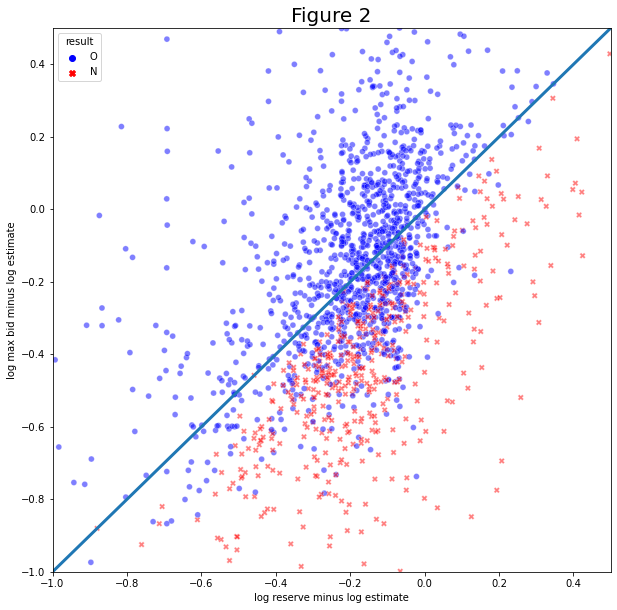

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.gcf()

fig.set_size_inches(10, 10)

plt.xlim((-1,0.5))
plt.ylim((-1,0.5))
plt.plot([-1, 0.5], [-1, 0.5], linewidth=3)


plot = sns.scatterplot(data = data_wide, x = 'x', y = 'y', hue = 'result', s=35, style="result", palette = ['blue', 'red'], alpha = 0.5)
plot.set_xlabel('log reserve minus log estimate')
plot.set_ylabel('log max bid minus log estimate')
plot.set_title('Figure 2', fontsize=20)




# Table 5

In [60]:
# add constant feature
data_wide.insert(1, "constant", 1)

In [61]:
# recode owner status, where ONF-owned is 1 and Community-owned forest is 0
data_wide['owner'] = data_wide['owner'].replace('DO', 1)
data_wide['owner'] = data_wide['owner'].replace('AS', 0)

In [62]:
# rescale
data_wide['mean_bid'] = data_wide['mean_bid'] / data_wide['res_i']
data_wide['max_bid'] = data_wide['max_bid'] / data_wide['res_i']
data_wide['estim'] = data_wide['estim'] / data_wide['res_i']

In [63]:
# take into account the condition that there must be at least 2 participants
data_wide = data_wide[data_wide['n_bidders'] >= 2]

In [64]:
# substract from the average price the maximum
data_wide['mean_bid'] = (data_wide['mean_bid']*data_wide['n_bidders'] - data_wide['max_bid']) / (data_wide['n_bidders'] - 1)

In [65]:
data_wide

,session,constant,lot_order,lot_order_norm,lot_num,lot_id,estim,res_i,result,win_bid,...,ln_dres_mean_bid,ln_pres_min_bid,ln_pres_max_bid,ln_pres_mean_bid,ln_random_bid_1,ln_random_bid_2,ln_random_bid_3,ln_random_bid_4,ln_random_bid_5,ln_random_bid_6
0,1,1,1,0.008197,35069,03200400A7,1.055125,24000,O,23069.0,...,8.312544,0.309199,0.038058,0.156778,10.007893,10.046288,9.943093,9.779454,9.635935,9.928814
1,1,1,2,0.016393,35070,03200200A7,1.022556,9000,O,8400.0,...,7.392032,0.261338,0.064539,0.165703,9.036106,8.977273,8.755738,8.750366,NaN,NaN
2,1,1,3,0.024590,35071,03100200A7,1.211464,28000,O,37800.0,...,NaN,0.289466,-0.430783,-0.051381,10.367473,9.830971,NaN,NaN,NaN,NaN
5,1,1,6,0.049180,35074,03100100A7,2.824444,4500,O,15706.0,...,NaN,NaN,NaN,NaN,9.457825,9.236398,9.424887,9.479069,9.661862,9.629116
6,1,1,7,0.057377,35075,03200600A7,0.999315,24807,O,24807.0,...,8.454608,0.388075,0.000000,0.173355,10.045464,9.904537,9.605957,9.476237,10.064798,9.885884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,10,1,217,0.640118,30679,030773FAA3,1.062500,18000,O,16999.0,...,8.295299,0.285889,0.054120,0.200852,9.396322,9.446282,9.740969,9.398478,NaN,NaN
2251,10,1,220,0.648968,30682,03016300A3,1.052842,19000,O,20200.0,...,6.484126,0.092915,-0.065241,0.033825,9.776222,9.749812,9.852194,9.913487,9.791774,9.811153
2254,10,1,223,0.657817,30685,02430136A3,1.328286,3500,N,NaN,...,6.543912,0.228842,0.130527,0.180892,7.863651,8.010692,NaN,NaN,NaN,NaN
2255,10,1,224,0.660767,30686,02029400A3,0.864257,8855,N,NaN,...,7.444638,0.425035,0.050858,0.176533,8.909370,8.958154,8.334712,8.955061,9.035272,8.909100


## Logit Model without any controls

In [67]:
import statsmodels.api as sm

# necessary features
cols=['constant', 'ln_n_bidders', 'max_bid', 'mean_bid', 'owner', 'estim'] 
X_raw=data_wide[cols]

X_raw['owner × ln_n_bidders'] = X_raw['owner'] * X_raw['ln_n_bidders']
X_raw['owner × max_bid'] = X_raw['owner'] * X_raw['max_bid']
X_raw['owner × mean_bid'] = X_raw['owner'] * X_raw['mean_bid']
X_raw['owner × estim'] = X_raw['owner'] * X_raw['estim']

# target
y=data_wide['result']
y = y.replace('O', 1)
y = y.replace('N', 0)

# model
logit_model=sm.Logit(y,X_raw)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.314387
         Iterations 9
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.407      
Dependent Variable:    result            AIC:               810.3687   
Date:                  2022-09-18 12:49  BIC:               861.7335   
No. Observations:      1257              Log-Likelihood:    -395.18    
Df Model:              9                 LL-Null:           -666.67    
Df Residuals:          1247              LLR p-value:       3.5587e-111
Converged:             1.0000            Scale:             1.0000     
No. Iterations:        9.0000                                          
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
constant             -12.1664   1.1567 -10.5179 0.0000 -14.4335

/var/folders/g6/h54zm38s0yxgp8fzt3h3tqbc0000gn/T/ipykernel_45726/154279856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw['owner × ln_n_bidders'] = X_raw['owner'] * X_raw['ln_n_bidders']
/var/folders/g6/h54zm38s0yxgp8fzt3h3tqbc0000gn/T/ipykernel_45726/154279856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw['owner × max_bid'] = X_raw['owner'] * X_raw['max_bid']
/var/folders/g6/h54zm38s0yxgp8fzt3h3tqbc0000gn/T/ipykernel_45726/154279856.py:9: SettingWithCopyWarning: 
A value is trying to

## Add categorical controls: stand, cut, land_area, grape, quality, conditions

In [68]:
# get rid of gaps
data_wide_no_mis = data_wide[['constant', 'ln_n_bidders', 'max_bid', 'mean_bid', 'res_i', 'owner', 'estim', 'result', 'stand', 'cut', 'land_area', 'grape', 'quality', 'conditions', 'v_total', 'herf1', 'surf', 'n_trees', 'lot_order']].dropna()

In [69]:
# necessary features
cols=['constant', 'ln_n_bidders', 'max_bid', 'mean_bid', 'owner', 'estim', 'stand', 'cut', 'land_area', 'grape', 'quality', 'conditions'] 
X_raw=data_wide_no_mis[cols]
X_raw['owner × ln_n_bidders'] = X_raw['owner'] * X_raw['ln_n_bidders']
X_raw['owner × max_bid'] = X_raw['owner'] * X_raw['max_bid']
X_raw['owner × mean_bid'] = X_raw['owner'] * X_raw['mean_bid']
X_raw['owner × estim'] = X_raw['owner'] * X_raw['estim']

X_categ = pd.get_dummies(X_raw[['stand', 'cut', 'land_area', 'grape', 'quality', 'conditions']])
X2 = X_raw.join(X_categ)
X2 = X2.drop(['stand', 'cut', 'land_area', 'grape', 'quality', 'conditions'], axis = 1)

# target
y=data_wide_no_mis['result']
y = y.replace('O', 1)
y = y.replace('N', 0)

# model
logit_model=sm.Logit(y,X2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.291896
         Iterations 11
                                    Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.449      
Dependent Variable:         result                 AIC:                    783.9028   
Date:                       2022-09-18 12:50       BIC:                    937.5888   
No. Observations:           1240                   Log-Likelihood:         -361.95    
Df Model:                   29                     LL-Null:                -657.39    
Df Residuals:               1210                   LLR p-value:            5.0107e-106
Converged:                  1.0000                 Scale:                  1.0000     
No. Iterations:             11.0000                                                   
--------------------------------------------------------------------------------------
                      Coef.     Std.Err.      z    P>|z|      [

/var/folders/g6/h54zm38s0yxgp8fzt3h3tqbc0000gn/T/ipykernel_45726/2673611196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw['owner × ln_n_bidders'] = X_raw['owner'] * X_raw['ln_n_bidders']
/var/folders/g6/h54zm38s0yxgp8fzt3h3tqbc0000gn/T/ipykernel_45726/2673611196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw['owner × max_bid'] = X_raw['owner'] * X_raw['max_bid']
/var/folders/g6/h54zm38s0yxgp8fzt3h3tqbc0000gn/T/ipykernel_45726/2673611196.py:6: SettingWithCopyWarning: 
A value is trying

## Add continuous controls: v_total, herf1, surf, n_trees, lot_order

In [70]:
# necessary features
cols=['constant', 'ln_n_bidders', 'max_bid', 'mean_bid', 'owner', 'estim', 'stand', 'cut', 'land_area', 'grape', 'quality', 'conditions', 'v_total', 'herf1', 'surf', 'n_trees', 'lot_order'] 
X_raw=data_wide_no_mis[cols]
X_raw['owner × ln_n_bidders'] = X_raw['owner'] * X_raw['ln_n_bidders']
X_raw['owner × max_bid'] = X_raw['owner'] * X_raw['max_bid']
X_raw['owner × mean_bid'] = X_raw['owner'] * X_raw['mean_bid']
X_raw['owner × estim'] = X_raw['owner'] * X_raw['estim']

X_categ = pd.get_dummies(X_raw[['stand', 'cut', 'land_area', 'grape', 'quality', 'conditions']])
X2 = X_raw.join(X_categ)
X2 = X2.drop(['stand', 'cut', 'land_area', 'grape', 'quality', 'conditions'], axis = 1)

# target
y=data_wide_no_mis['result']
y = y.replace('O', 1)
y = y.replace('N', 0)

# model
logit_model=sm.Logit(y,X2)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.286468
         Iterations: 35
                                    Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.460      
Dependent Variable:         result                 AIC:                    780.4413   
Date:                       2022-09-18 12:50       BIC:                    959.7417   
No. Observations:           1240                   Log-Likelihood:         -355.22    
Df Model:                   34                     LL-Null:                -657.39    
Df Residuals:               1205                   LLR p-value:            1.4310e-105
Converged:                  0.0000                 Scale:                  1.0000     
No. Iterations:             35.0000                                                   
--------------------------------------------------------------------------------------
                      Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
-------------

/var/folders/g6/h54zm38s0yxgp8fzt3h3tqbc0000gn/T/ipykernel_45726/4076429147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw['owner × ln_n_bidders'] = X_raw['owner'] * X_raw['ln_n_bidders']
/Users/Arina/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Conclusions
Figure 2 shows spreading of sold and unsold tracts by normalized maximum bid and secret reserve price. As a result, most of the items are sold when their maximum bidder is higher than reserved price.

Table 5 represents the positive dependence of the auction result on the number of bidders received, owner of the forest and no influence of the mean bid and the appraisal value.

This paper studied the usage of secret reserve prices in conditions of unobserved by seller auction heterogeneity and made the following conclusion: first of all, having secret reserve price might be really efficient for seller, because it helps to orientate in auction decisions based on bidders' prices and, consequently, improve allocation rule but with the profit reduction. 